<h3> Análise Exploratória de base de dados de Crédito </h3>

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import mode

In [5]:
dados = pd.read_csv('desafio1.csv')

In [6]:
dados.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [7]:
#Há valores missing na pontuação crédito? 
dados.pontuacao_credito.isnull().sum()
#Então não há nenhum valor missing

0

In [19]:
dados['estado_residencia'].value_counts()

SC    3519
RS    1750
PR    1731
Name: estado_residencia, dtype: int64

In [8]:
#Vamos obter os valores por estado então. 
SC = pd.DataFrame(dados[dados['estado_residencia'] == "SC"])
RS = dados[dados['estado_residencia'] == 'RS']
PR = dados[dados['estado_residencia'] == 'PR']

In [9]:
def estatisticas(serie):
    lista = [serie.mode(),
             serie.mean(),
             serie.median(),
             serie.std()]
    return lista

In [10]:
SC_list = estatisticas(SC.pontuacao_credito)
RS_list = estatisticas(RS.pontuacao_credito)
PR_list = estatisticas(PR.pontuacao_credito)    

In [11]:
print(SC_list)

[0    850
dtype: int64, 649.5376527422563, 653.0, 97.23349279343306]


In [12]:
print(RS_list)

[0    850
dtype: int64, 651.1051428571428, 650.0, 95.1365984138357]


In [13]:
print(PR_list)

[0    850
dtype: int64, 648.9612940496822, 650.0, 98.60718591309772]


## Histogramas com assimetria à esquerda (negativa) 

Moda > Mediana > Média

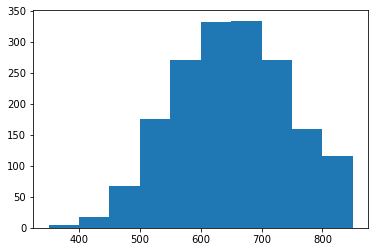

In [27]:
plt.hist(RS.pontuacao_credito)
plt.show()

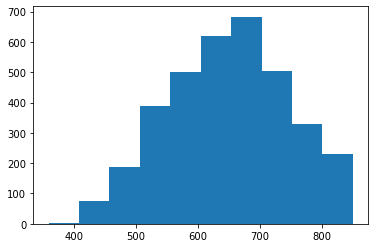

In [28]:
plt.hist(SC.pontuacao_credito)
plt.show()

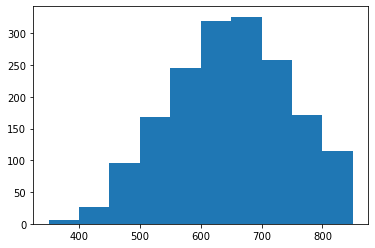

In [29]:
plt.hist(PR.pontuacao_credito)
plt.show()

## Pontuação de crédito por estado

In [30]:
pontuacao_credito = dados.groupby('estado_residencia')['pontuacao_credito'].mean()

In [18]:
pontuacao_credito

estado_residencia
PR    648.961294
RS    651.105143
SC    649.537653
Name: pontuacao_credito, dtype: float64